In [5]:
import numpy as np
import meshio # pip install meshio

class triangulation2DFEM(object):
    def __init__(self, Coordinates, Elements, BoundaryList=None, BoundaryFlag=None, DirichletFlag=None, NeumannFlag=None):
        
        self.Coordinates = np.asarray(Coordinates, dtype=np.float64)
        self.Elements = self.x = np.asarray(Elements, dtype=np.float64)
        self.NN = np.size(Coordinates,0)
        self.NE = np.size(Elements,0)
        
        # Obtain list of edges
        TempAllEdges = np.array([np.concatenate((Elements[:,1],Elements[:,2], Elements[:,0]) ), np.concatenate((Elements[:,2],Elements[:,0], Elements[:,1]) )]).T
        TempEdges = np.array([np.amin(TempAllEdges, axis =1),np.amax(TempAllEdges, axis = 1)]).T
        MinEdges, indices, inverse, counts = np.unique(TempEdges, axis=0, return_index =True, return_inverse=True, return_counts=True)
        Ne = np.size(MinEdges,0)
        
        # Connectivity for edges
        EleEdges = inverse.reshape((self.NE,3), order ='F')
        
        self.Edges = MinEdges
        self.Ne = np.size(self.Edges,0)
        self.EleEdges = EleEdges
        
        BEi = np.where((counts==1))[0]
        BEdges = MinEdges[BEi,:]
        BEdgesraw = TempAllEdges[indices[BEi],:]
        
        if BoundaryList is not None:
            BoundaryListsort = np.sort(BoundaryList)
            tempsort = BoundaryListsort[:,0].argsort()
            Btemp = np.unique(BoundaryListsort[tempsort], axis=0)
            if np.array_equal(Btemp,BEdges): 
                BoundaryListEdgesIndex = BEi[np.argsort(tempsort)]
                self.BoundaryEdges = BoundaryList
                self.BoundaryEdgesindex = BoundaryListEdgesIndex
            else:
                raise ValueError('Error in construction of Edges')
            # end
        else:
            self.BoundaryEdges = BEdgesraw
            self.BoundaryEdgesIndex = BEi
        # end
                
        if BoundaryFlag is not None:
            self.BoundaryFlag = BoundaryFlag
        else:
            self.BoundaryFlag = None
        # end
        if DirichletFlag is not None:
            self.DirichletFlag = DirichletFlag
            
        else:
            self.DirichletFlag = None
        # end
        if NeumannFlag is not None:
            self.NeumannFlag = NeumannFlag
        else:
            self.NeumannFlag = None
        # end
    # end __init__
# end class
        
# read meshes created with gmsh .msh files
def readmesh(filename):
    Thgmsh = meshio.read(filename+'.msh')
    #print(Thgmsh.__dict__)
    Coordinates = Thgmsh.points
    Elements = Thgmsh.cells['triangle']
    BoundaryList = Thgmsh.cells['line']
    BoundaryFlag = None
    if 'gmsh:physical' in Thgmsh.cell_data['line']:
        BoundaryFlag = Thgmsh.cell_data['line']['gmsh:physical']
        if 'Dirichlet' in Thgmsh.field_data:
            DirichletFlag = Thgmsh.field_data['Dirichlet'][0]
            #print('Dirichlet flag in mesh BoundaryFlag is: ', DirichletFlag)
        if 'Neumann' in Thgmsh.field_data: 
            NeumannFlag = Thgmsh.field_data['Neumann'][0]
    # end if
    #Th = triangulation2DFEM(Coordinates, Elements, BoundaryList, BoundaryFlag, DirichletFlag, NeumannFlag)
    Th = triangulation2DFEM(Coordinates, Elements)
    return Th
    
    
def plotgmsh(points, cells):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(6,6))
    plt.triplot(points[:,0], points[:,1], triangles= cells)
    plt.gca().set_aspect("equal", "datalim")
    plt.axis("off")

    plt.show()
    #plt.savefig(filename, transparent=True)
    return
def plotboundarygmsh(points, Boundary):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(10,10))
    for j in range(np.size(Boundary,0)):
        ax.plot(points[Boundary[j,0:2],0], points[Boundary[j,0:2],1],'k')
        #plt.pause(0.5)
    fig.gca().set_aspect("equal", "datalim")
    ax.axis('off')
    plt.show()
                        

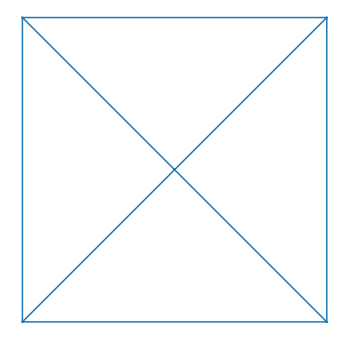

In [6]:

# Simple mesh
X = np.array([[0,0],[1,0],[0.5,0.5],[0,1],[1,1]])
Ele = np.array([[0,1,2],[0,2,3],[1,4,2],[2,4,3]])

Th = triangulation2DFEM(X, Ele)
# plot the mesh
plotgmsh(Th.Coordinates, Th.Elements)
# Plot of the boundary
#plotboundarygmsh(Th.Coordinates,Th.BoundaryEdges)

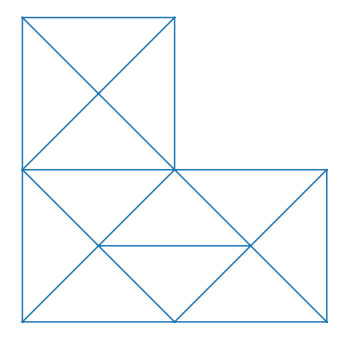

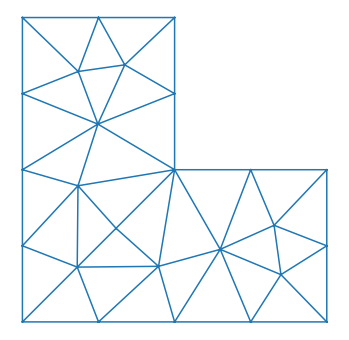

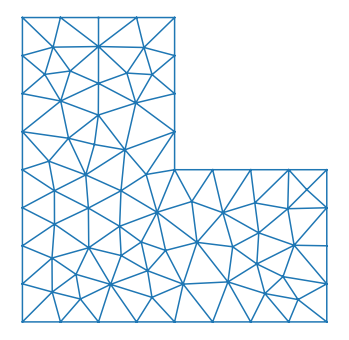

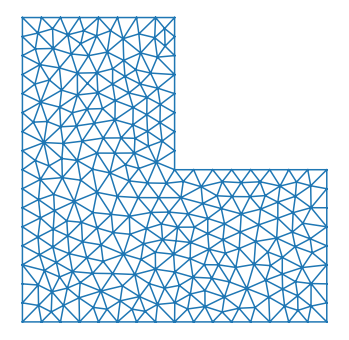

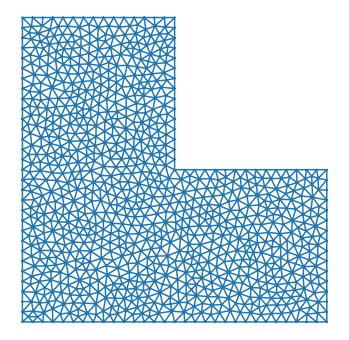

In [7]:
Th_L = readmesh('Lshapeddomain1')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain2')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain3')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain4')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
Th_L = readmesh('Lshapeddomain5')
# plot the mesh
plotgmsh(Th_L.Coordinates, Th_L.Elements)
# Plot of the boundary
#plotboundarygmsh(Th_L.Coordinates,Th_L.BoundaryEdges)

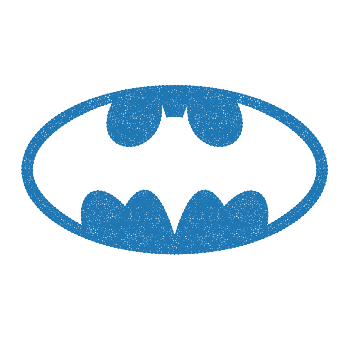

In [9]:
# Batman mesh
Th = readmesh('batman2')
# plot the mesh
plotgmsh(Th.Coordinates, Th.Elements)
# Plot of the boundary
#plotboundarygmsh(Th.Coordinates,Th.BoundaryEdges)

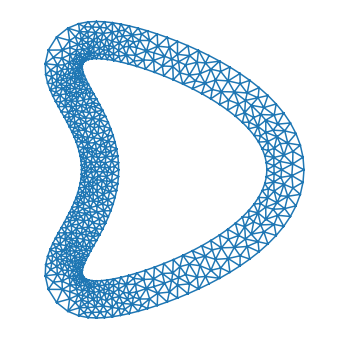

In [10]:
# kite mesh
#Th_kite = readmesh('kite_e02')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e02_fine')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e03')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e03_fine')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e04')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e04_fine')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e05')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)
Th_kite = readmesh('kite_e05_fine')
# plot the mesh
plotgmsh(Th_kite.Coordinates, Th_kite.Elements)

# Plot of the boundary
#plotboundarygmsh(Th_kite.Coordinates,Th_kite.BoundaryEdges)